In [2]:
# # Dataset
from keras.datasets import imdb


In [ ]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=10000)


In [ ]:
print(X_train[0])
print(X_train.shape)
# max([max(sequence) for sequence in X_train])

In [50]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])  ##要空格


In [36]:
word_index["in"]
word_index['at']
reverse_word_index[1]
reverse_word_index[2]
### reverse_word_index[0]  nothing


'and'

In [51]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [52]:
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [61]:
x_train = vectorize_sequence(X_train)
x_test = vectorize_sequence(X_test)
print(x_train[0])
print(X_train.shape)
print(x_train.shape)
print(x_test.shape)
y_train = np.asarray(Y_train).astype('float32')
y_test = np.asarray(Y_test).astype('float32')
# print(type(y_train))
# aa = Y_train.astype('float32')
# print(type(aa))

[0. 1. 1. ... 0. 0. 0.]
(25000,)
(25000, 10000)
(25000, 10000)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [141]:
print(Y_train)
print(y_train)

[1 0 0 ... 0 1 0]
[1. 0. 0. ... 0. 1. 0.]


In [83]:
import keras 
from keras import models, layers
from keras.utils import np_utils
from keras import backend as K
from keras.layers import Dense
import matplotlib.pyplot as plt
epochs = 20
batch_size = 512

In [136]:
model = models.Sequential()
activation = ['relu', 'tanh']
model.add(Dense(16, activation=activation[0], input_shape=(10000, )))  ##input layer + hidden layer
model.add(Dense(32, activation=activation[0]))  ##hidden layer
# model.add(Dense(64, activation='relu'))  ##hidden layer
model.add(Dense(1, activation='sigmoid'))  ##output 

In [137]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [138]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              # loss='mse',
              metrics=['acc'])

In [139]:
history = model.fit(partial_x_train, partial_y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5614 - acc: 0.7145 - val_loss: 0.3412 - val_acc: 0.8725
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2729 - acc: 0.9076 - val_loss: 0.2910 - val_acc: 0.8803
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1762 - acc: 0.9408 - val_loss: 0.2735 - val_acc: 0.8885
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1274 - acc: 0.9587 - val_loss: 0.3050 - val_acc: 0.8845
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1013 - acc: 0.9669 - val_loss: 0.3308 - val_acc: 0.8809
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0714 - acc: 0.9778 - val_loss: 0.3866 - val_acc: 0.8787
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0552 - acc: 0.9843 - val_loss: 0.5388 - val_acc: 0.8500
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0479 - a

In [111]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


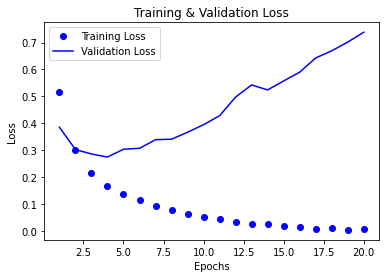

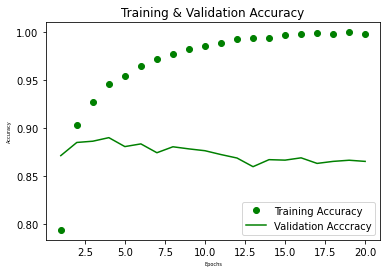

In [112]:
epoch = range(1, len(loss_values)+1)
# print(len(epoch))
# print(len(loss_values))
plt.figure()
plt.plot(epoch, loss_values, 'bo', label="Training Loss")
plt.plot(epoch, val_loss_values, 'b', label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(epoch, acc_values, "go", label="Training Accuracy")
plt.plot(epoch, val_acc_values, "g", label="Validation Acccracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs", fontsize=5)
plt.ylabel("Accuracy", fontsize=5)
plt.legend()
plt.show()

In [94]:
# # Predict
pred_result = model.predict(x_test)

In [104]:
count = 0
print(len(pred_result))
print(pred_result)
# [count + 1 for jj in pred_result if jj >= 85]
for jj in pred_result:
  if jj >= 0.7:
    count += 1
print(count)

25000
[[0.00444838]
 [1.        ]
 [0.9954611 ]
 ...
 [0.00228193]
 [0.01939011]
 [0.8639988 ]]
11599
